# Analyzing the cohorts of Titanic survivors

## Description

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

Striking an iceberg led to the sinking of the Titanic on April 15, 1912, resulting in the tragic loss of 1502 lives out of 2224 passengers and crew. This incident had a profound impact globally, prompting the establishment of improved safety regulations for maritime travel.

A significant factor contributing to the high casualty count was the insufficient number of lifeboats available for passengers and crew. Survival during the sinking was influenced by various factors, including luck, with certain groups having higher chances of survival, such as women, children, and those from the upper class.

This analy to utildata analyticsning tools to expdict the likelihood of survival for different groups of passengers during the Titanic tragedy.

## Imports and variables

In [2]:
import pandas as pd
import numpy as np
import pylab as plt

# default size of figures
plt.rc('figure', figsize=(10, 5))

# default size of figures that contain subplots
fizsize_with_subplots = (10, 10)

# default size of  bins
bin_size = 10

## Read the data

In [57]:
df_train = pd.read_csv('data/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)

The data contains missing values in the columns for Age, Cabin, and Embarked. The Cabin column has a substantial number of missing values, making it challenging to fill in those gaps. However, there is a possibility of inferring or estimating values for Age and Embarked based on the available data.

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualization of selected features to enhance understanding of each one:

Text(0.5, 1.0, 'Age Histogram')

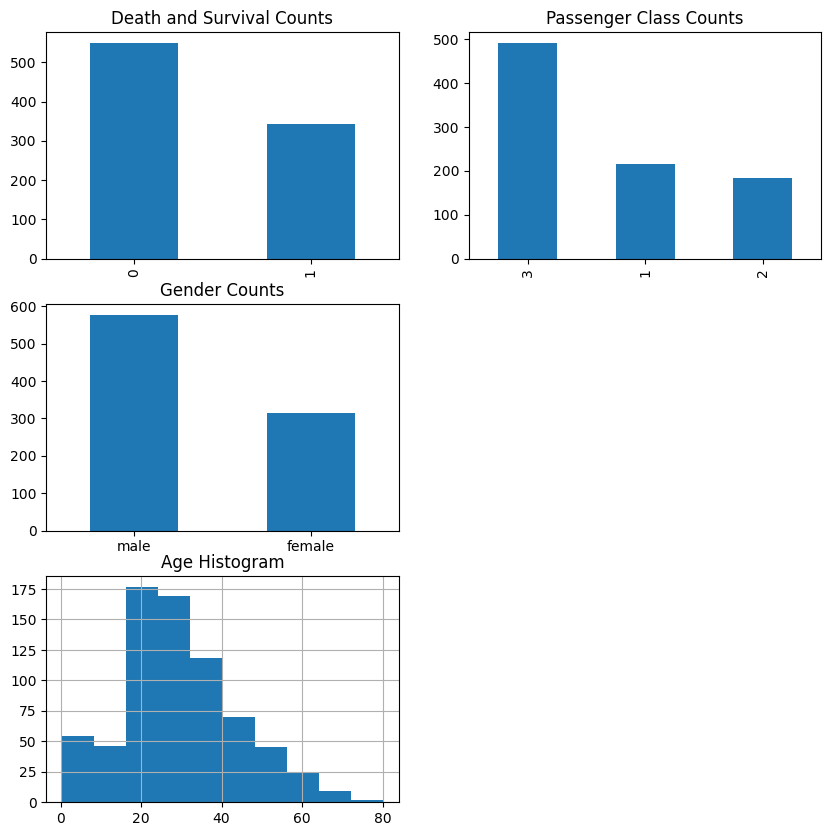

In [94]:
# setting of grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')


## Feature analysis: Passenger classes

There are three passenger classes: first, second and third. Proportion of passengers survived based on their class:

In [9]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

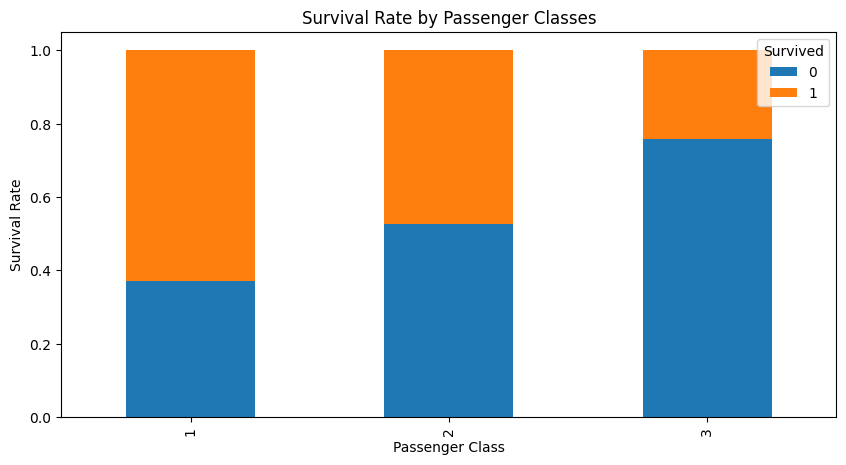

In [10]:
# normalization of the cross tab (to sum to 1):
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Observations indicate that the passenger class strongly influences the likelihood of survival, with those in First Class having the highest probability of surviving.

## Feature analysis: Sex

Mapping of Sex from a string to a number representation:

In [15]:
sexes = sorted(df_train['Sex'].unique())
gender_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
gender_mapping

{'female': 0, 'male': 1}

In [58]:
df_train['Sex_Val'] = df_train['Sex'].map(gender_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Normalized cross tab for Sex_Val and Survived:

<AxesSubplot:title={'center':'Survival rate by Gender'}, xlabel='Sex_Val'>

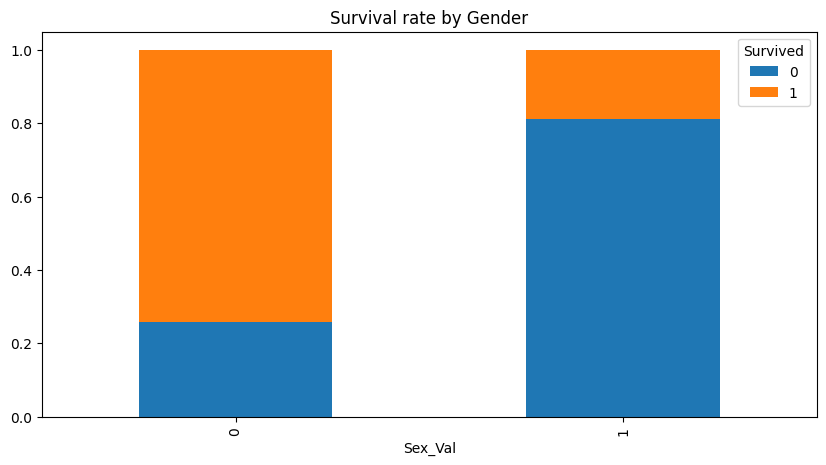

In [59]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival rate by Gender')

Most females survived, while the majority of males did not.

Counting males and females in each Pclass:

In [60]:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Text(0, 0.5, 'Survival Rate')

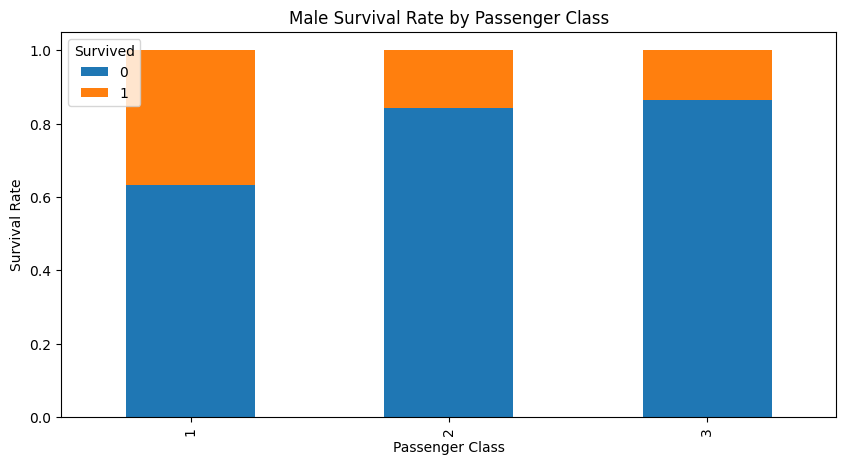

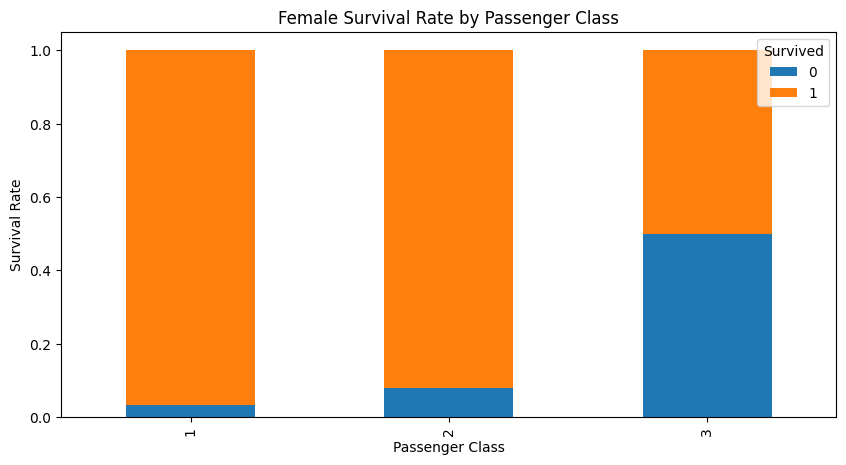

In [22]:
# survival rate by Sex
females_df = df_train[df_train['Sex'] == 'male']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'female']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The overwhelming majority of females in First and Second class managed to survive. Additionally, among males, those in First class had the highest likelihood of surviving.

## Feature analysis: Age

The Age column appears to be a crucial feature in our dataset, but unfortunately, it has a significant number of missing values.

In [96]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN



Establish the typical age for each passenger class based on gender( using the median instead of the mean, given the right-skewed distribution observed in the Age histogra).

In [100]:
df_train['AgeFill'] = df_train['Age']

df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']], group_keys=False) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure that AgeFill does not contain missing values:

In [101]:
len(df_train[df_train['AgeFill'].isnull()])

0

Normalized cross tab for AgeFill and Survived:

Text(0, 0.5, 'Age')

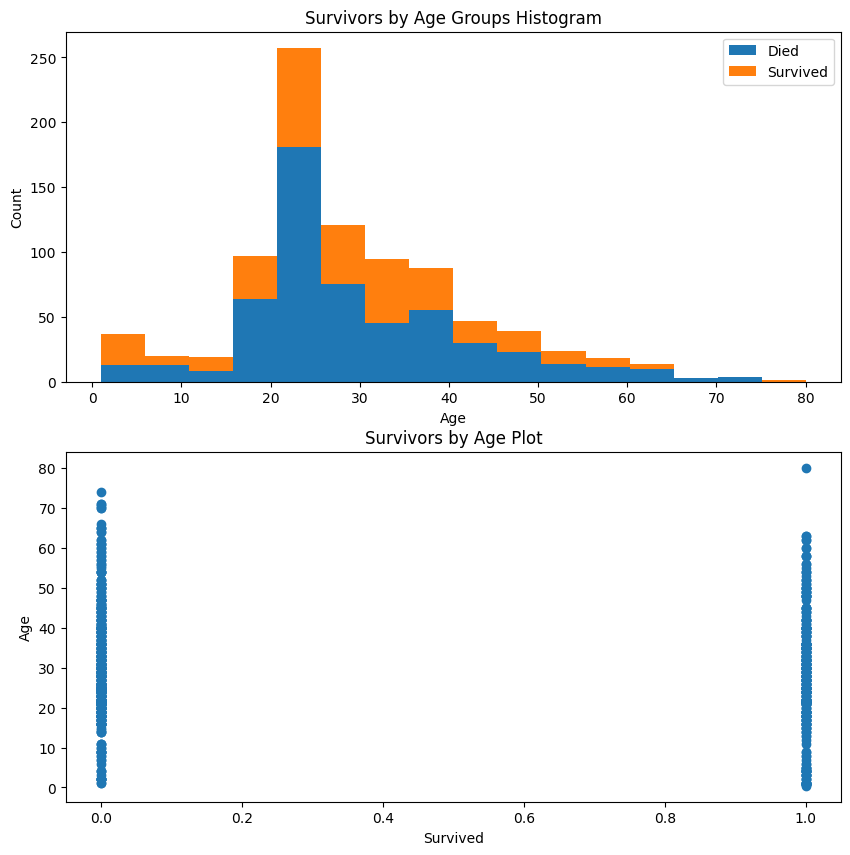

In [103]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['AgeFill']
df2 = df_train[df_train['Survived'] == 1]['AgeFill']

# Calculate the number of bins based on bin_size
bin_size = 5
num_bins = int(max(df_train['AgeFill']) / bin_size)

axes[0].hist([df1, df2],
             bins=num_bins,
             range=(1, max(df_train['AgeFill'])),
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')


Regrettably, the depicted graphs above do not appear to reveal any distinct insights.

Plot AgeFill density by Pclass:

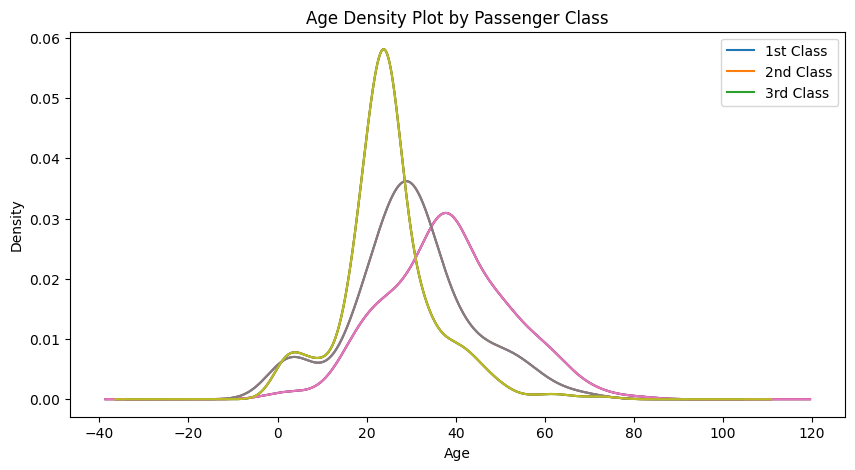

In [108]:
%pip install scipy
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()


Observing the density of AgeFill based on passenger class reveals a trend where first-class passengers tended to be older than second-class passengers, and second-class passengers were generally older than third-class passengers. This aligns with our previous findings that first-class passengers exhibited a higher survival rate compared to second-class passengers, who, in turn, had a higher survival rate than third-class passengers.

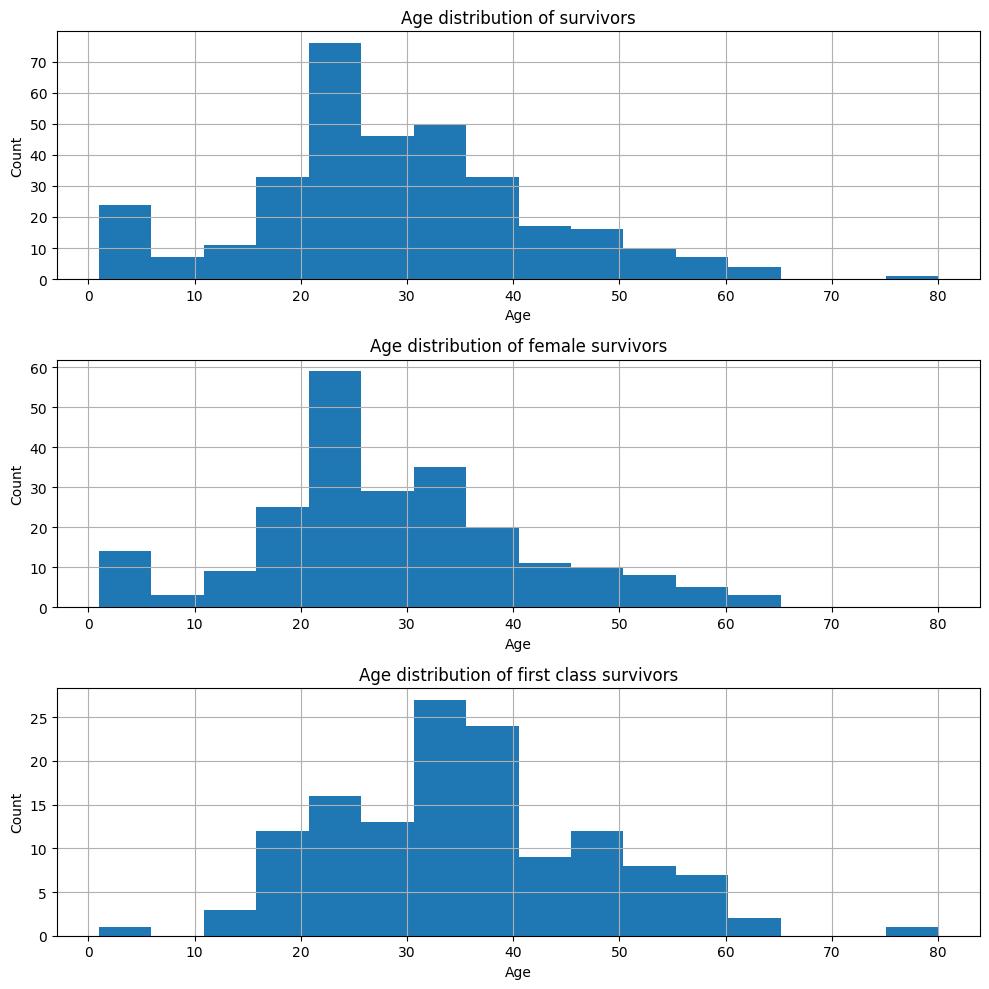

In [112]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title('Age distribution of survivors')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title('Age distribution of female survivors')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title('Age distribution of first class survivors')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


The initial graph indicates that a significant portion of survivors falls within the age range of 20 to 30, and this observation may find clarification in the subsequent two graphs. The second graph illustrates that the majority of female survivors are in their 20s, while the third graph highlights that a significant number of survivors in the first class are in their 30s.

## Feature analysis: Family size

Define a feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [113]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,35.0,0


Histogram of FamilySize:

Text(0.5, 1.0, 'Family Size Histogram')

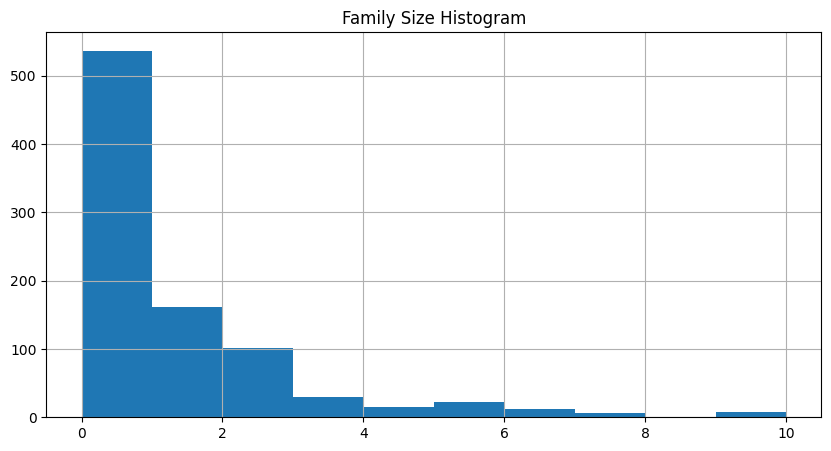

In [114]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Histogram of AgeFill segmented by Survived:

Text(0.5, 1.0, 'Survivors by Family Size')

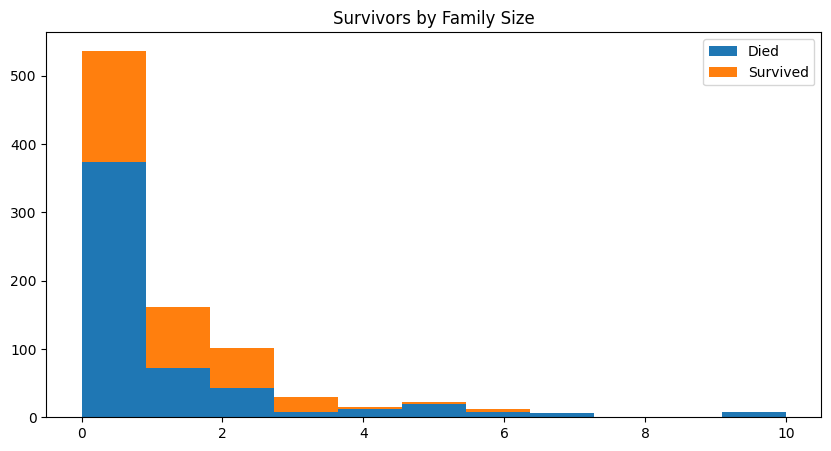

In [115]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Upon examining the histograms, it is not readily apparent how FamilySize directly influences the likelihood of survival. The visual representation does not immediately reveal any discernible patterns or trends regarding the impact of FamilySize on survival outcomes.